In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
# Reading the training file
RawData= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [85]:
#Importing Total number of cases from the Total cases file
dn_cases= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
dn_cases.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [86]:
# Importing the Total Number of cases 
RawData['Total_Cases'] = dn_cases['total_cases']
RawData.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [87]:
# Spliting the  Cities, San Juan and Iquitos.
#dn_sj represents San Juan
dn_sj = RawData[RawData['city']=='sj']
dn_sj.iloc[910]

city                                             sj
year                                           2007
weekofyear                                       44
week_start_date                          2007-10-29
ndvi_ne                                      0.1243
ndvi_nw                                      0.0543
ndvi_se                                    0.156814
ndvi_sw                                    0.123529
precipitation_amt_mm                         137.55
reanalysis_air_temp_k                       299.459
reanalysis_avg_temp_k                       299.543
reanalysis_dew_point_temp_k                  296.02
reanalysis_max_air_temp_k                     302.1
reanalysis_min_air_temp_k                     297.7
reanalysis_precip_amt_kg_per_m2              174.64
reanalysis_relative_humidity_percent        81.5943
reanalysis_sat_precip_amt_mm                 137.55
reanalysis_specific_humidity_g_per_kg       17.5029
reanalysis_tdtr_k                               2.6
station_avg_

In [88]:
#dn_iq represents Iquitos
dn_iq = RawData[RawData['city']=='iq']
dn_iq.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [89]:
#Filling the NULL values for San Juan city with the mean of each column
dn_sj = dn_sj.fillna(value=dn_sj.mean())
dn_sj.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [90]:
#Filling the NULL values for the city Iquitos with the mean of each column
dn_iq = dn_iq.fillna(value=dn_iq.mean())
dn_iq.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


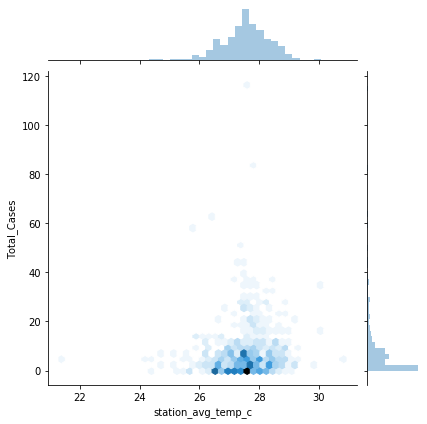

In [91]:
sns.jointplot(x = 'station_avg_temp_c', y = 'Total_Cases', data = dn_iq, kind = 'hex')

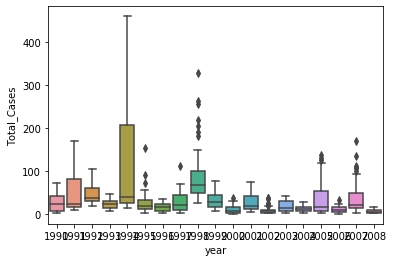

In [92]:
sns.boxplot(x='year', y = 'Total_Cases', data = dn_sj)

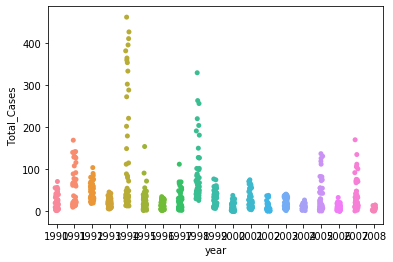

In [93]:
sns.stripplot(x='year', y = 'Total_Cases', data = dn_sj)

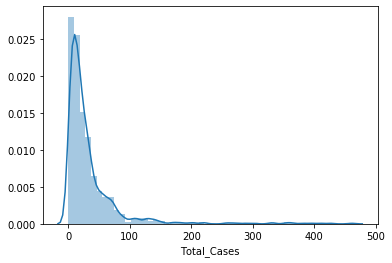

In [94]:
sns.distplot(dn_sj['Total_Cases'])

In [95]:
#Since we are predicting the Total Cases we are droping the Totaol_cases column as this will be "Y" value
x1 = dn_sj.drop(['Total_Cases'], axis = 1).values
x1

array([['sj', 1990, 18, ..., 29.4, 20.0, 16.0],
       ['sj', 1990, 19, ..., 31.7, 22.2, 8.6],
       ['sj', 1990, 20, ..., 32.2, 22.8, 41.4],
       ...,
       ['sj', 2008, 15, ..., 29.4, 21.7, 30.7],
       ['sj', 2008, 16, ..., 29.4, 21.7, 11.2],
       ['sj', 2008, 17, ..., 31.7, 23.3, 0.3]], dtype=object)

In [66]:
#WE are removing the Yean and City Column as they do mot hae any correlation with the rest of the data
x = np.delete(x1,[0,3],1)
x = np.delete(x,0,1)
x

array([[18, 0.1226, 0.103725, ..., 29.4, 20.0, 16.0],
       [19, 0.1699, 0.142175, ..., 31.7, 22.2, 8.6],
       [20, 0.03225, 0.1729667, ..., 32.2, 22.8, 41.4],
       ...,
       [15, -0.1552, -0.05275, ..., 29.4, 21.7, 30.7],
       [16, 0.0018, 0.06746906815219837, ..., 29.4, 21.7, 11.2],
       [17, -0.037000000000000005, -0.01036667, ..., 31.7, 23.3, 0.3]],
      dtype=object)

In [96]:
x = dn_sj[[ 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 
       'station_avg_temp_c',  'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',]]

In [97]:
# We are assigning the Y values to the Total Cases as we need to train the Data for running the model on TEST dataset
y = dn_sj['Total_Cases'].values

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.3, random_state = 3)

In [99]:
from sklearn.ensemble import RandomForestRegressor 

In [100]:
regressor = RandomForestRegressor(n_estimators=50)

In [101]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [102]:
pr = regressor.predict(x_test)

In [103]:
pr

array([  7.64      ,  60.42666667,  16.94      ,  60.52      ,
        24.2       ,  20.1       ,  15.64      ,  24.02      ,
        50.98      , 136.365     ,  24.44      ,  57.865     ,
        13.06      ,  54.66      ,  18.32      ,  25.24      ,
        20.96      ,  14.14      ,   9.52      ,  15.78      ,
        12.32      ,  30.4       ,  44.48      ,   9.8       ,
        11.72      ,  30.58      ,  66.905     ,  26.94      ,
        60.02      ,  29.50666667,  19.98      , 108.6       ,
        12.7       ,  25.92      ,   7.96      ,  29.44      ,
        17.44      ,  55.7       ,  12.52      ,  68.14      ,
        46.08      ,  77.44      ,  46.92      ,  54.72      ,
         8.68      ,  31.        ,  96.48833333,  34.22      ,
         8.38      ,  33.06      ,  11.62      ,   9.88      ,
        20.12      ,  37.22      ,  19.26      ,  25.92      ,
        12.32      ,  20.22      ,  20.24      , 173.67333333,
        48.12      ,  19.6       ,  14.84      ,  34.78

In [104]:
(y_test)

array([ 11,  59,   5,  26,  55,  55,   9,   5,  15,  84,  34,  53,   0,
        43,  13,   8,  21,  21,   6,  12,   4,  18,  35,   6,   8, 127,
       154,   2,   7,  28,  16,  17,   4, 129,   3,  54,   4,  44,   6,
        71,  33, 112,  48,  29,  15,  15, 353,  17,   2,  16,  16,   4,
        23, 141,  16,  78,  11,   9,  50, 359,  52,   7,  13,  28,  26,
        41,   4,  11,  29,   5,  17,   7,  30,   3,   8,   6,  64,   2,
        25,  14,   3,  56,  53,  92,  39,  89,  19,  11,  23,  38,  53,
         2,  17,  11,  49,  13,  18,  25,   6,  18,  55,   8,   2,   7,
        13,   9,  14, 150,   1,  24,   7,  19,  13, 202,  70,  31,  20,
        30,  17,  56,  17,  39,   5,   2,  85, 288,   2,  18,  13,  22,
       127,  61,  33,  30,  30,  20,  14,  36,  56,  73,  75,  20,   8,
       170,  38,  74,  75,  19,  40,   2,  46,  29,  17,  34,  24,   3,
        70,   3,   9,  27,  28,  14,   7,  45,  35,  26,  16,  12,   2,
       461,  80,  25, 140,  19,   8,  33,  46,   8,  31,  28,  1

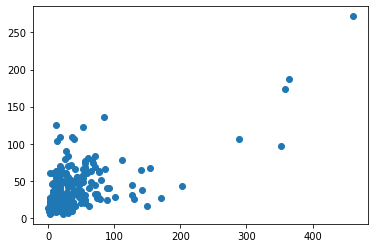

In [105]:
plt.scatter(y_test,pr)

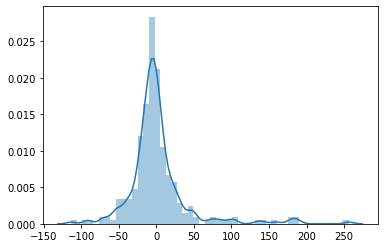

In [106]:
sns.distplot(y_test-pr)

In [107]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, pr)

23.69170225385528

In [108]:
metrics.mean_squared_error(y_test, pr)

1712.892050504152

In [109]:
np.sqrt(metrics.mean_squared_error(y_test, pr))

41.387100049461694